In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression

In [ ]:
#https://www.youtube.com/watch?v=wXQRLpDF-ms

In [98]:
data = pd.read_csv('C:/Users/Victor Manuel/Desktop/Brainnest/Week 4/Final Project/Datasets/credit_risk_dataset.csv')
display(data.head(20))
data.shape

person_age  person_income person_home_ownership  person_emp_length  \
0           22          59000                  RENT              123.0   
1           21           9600                   OWN                5.0   
2           25           9600              MORTGAGE                1.0   
3           23          65500                  RENT                4.0   
4           24          54400                  RENT                8.0   
5           21           9900                   OWN                2.0   
6           26          77100                  RENT                8.0   
7           24          78956                  RENT                5.0   
8           24          83000                  RENT                8.0   
9           21          10000                   OWN                6.0   
10          22          85000                  RENT                6.0   
11          21          10000                   OWN                2.0   
12          23          95000                  RENT                2.0   
13          26         108160                  RENT                4.0   
14          23         115000                  RENT                2.0   
15          23         500000              MORTGAGE                7.0   
16          23         120000                  RENT                0.0   
17          23          92111                  RENT                7.0   
18          23         113000                  RENT                8.0   
19          24          10800              MORTGAGE                8.0   

          loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            PERSONAL          D      35000          16.02            1   
1           EDUCATION          B       1000          11.14            0   
2             MEDICAL          C       5500          12.87            1   
3             MEDICAL          C      35000          15.23            1   
4             MEDICAL          C      35000          14.27            1   
5             VENTURE          A       2500           7.14            1   
6           EDUCATION          B      35000          12.42            1   
7             MEDICAL          B      35000          11.11            1   
8            PERSONAL          A      35000           8.90            1   
9             VENTURE          D       1600          14.74            1   
10            VENTURE          B      35000          10.37            1   
11    HOMEIMPROVEMENT          A       4500           8.63            1   
12            VENTURE          A      35000           7.90            1   
13          EDUCATION          E      35000          18.39            1   
14          EDUCATION          A      35000           7.90            0   
15  DEBTCONSOLIDATION          B      30000          10.65            0   
16          EDUCATION          A      35000           7.90            0   
17            MEDICAL          F      35000          20.25            1   
18  DEBTCONSOLIDATION          D      35000          18.25            1   
19          EDUCATION          B       1750          10.99            1   

    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                  0.59                         Y                           3  
1                  0.10                         N                           2  
2                  0.57                         N                           3  
3                  0.53                         N                           2  
4                  0.55                         Y                           4  
5                  0.25                         N                           2  
6                  0.45                         N                           3  
7                  0.44                         N                           4  
8                  0.42                         N                           2  
9                  0.16                         N                        

(32581, 12)

In [99]:
#drop duplicates
data.drop_duplicates(inplace=True) #deletes duplicated rows

# Check for missing values
print(data.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [96]:
data.dropna(inplace=True)

# Exploratory analysis

In [16]:
display(data['person_age'].unique()) #integer
display(data['person_income'].unique()) #continuous
display(data['person_home_ownership'].unique()) #categorical
display(data['person_emp_length'].unique()) #integer
display(data['loan_intent'].unique()) #categorical
display(data['loan_grade'].unique()) #categorical
display(data['loan_amnt'].unique()) #integer
display(data['loan_int_rate'].unique()) #continuous
display(data['loan_status'].unique()) #categorical (binary)
display(data['loan_percent_income'].unique()) #continuous[0,1]
display(data['cb_person_default_on_file'].unique()) #categorical (yes,no)
display(data['cb_person_cred_hist_length'].unique()) #integer

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67], dtype=int64)

array([  59000,    9600,   65500, ...,  720000, 1900000,    4888],
      dtype=int64)

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

array([35000,  1000,  5500,  2500,  1600,  4500, 30000,  1750, 34800,
       34000,  1500, 33950, 33000,  4575,  1400, 32500,  4000,  2000,
       32000, 31050, 24250,  7800, 20000, 10000, 25000, 18000, 12000,
       29100, 28000,  9600,  3000,  6100,  4200,  4750,  4800,  2700,
       27600,  3250, 27500, 27050, 27000, 26000, 25600, 25475, 21600,
       11900, 25300,  3650,  6000,  2400,  3600,  7500,  4950, 21000,
       16000, 22000,  7750, 24000, 15000, 15500,  9000, 23050,  5375,
        6250,  5000,  2100, 14000,  6200,  9950,  4475,  2600,  8000,
        4600,  3500,  7200,  8800,  3175,  2800, 13000,  1800,  3300,
        3200,  2275,  5600,  3625,  4375, 24750, 24500,  3900, 13750,
       15250, 24150,  2250,  4975,  4900, 23975, 23750, 23600, 23575,
        5400,  3375, 23400, 23000,  1200, 22750, 22500, 22400, 22250,
        7400, 21700,  7000, 21500, 21450, 21250,  9250, 20900, 20500,
       20400, 20375, 20050,  6400,  5650, 16600,  7125,  3550,  1275,
        3800,  1625,

array([16.02, 11.14, 12.87, 15.23, 14.27,  7.14, 12.42, 11.11,  8.9 ,
       14.74, 10.37,  8.63,  7.9 , 18.39, 10.65, 20.25, 18.25, 10.99,
        7.49, 16.77, 17.58,  7.29, 14.54, 12.68, 17.74,  9.32,  9.99,
       12.84, 11.12,  6.62, 14.17, 13.85, 13.49,  7.51, 16.89,   nan,
       17.99, 12.69,  7.88, 19.41, 10.38, 15.33, 16.45, 18.62, 15.96,
       11.48,  5.99, 11.58, 15.7 , 15.99, 14.84, 14.42,  6.99, 13.61,
        9.91, 13.48, 12.98, 13.57, 15.68, 13.06, 15.62, 11.71,  8.88,
       12.18, 13.99,  5.42, 12.73, 11.49, 19.91, 11.83, 14.59,  9.64,
       16.35, 18.67, 10.08, 10.36, 12.23, 16.07, 14.22, 14.79, 13.22,
       11.86, 13.43, 15.28, 17.93,  9.25, 10.62, 18.43, 11.36, 15.65,
       13.04, 17.04, 14.83, 14.65, 16.82, 10.25, 14.96, 11.99,  8.49,
        6.17, 16.32, 14.35, 15.21, 14.09, 17.49, 13.92, 16.49,  5.79,
       13.11,  6.54, 12.53, 15.95, 10.74, 15.27, 14.72, 13.35,  7.68,
       14.46, 13.47,  6.03, 12.92, 18.64, 16.7 , 18.3 ,  9.63, 14.7 ,
       15.37, 14.26,

array([1, 0], dtype=int64)

array([0.59, 0.1 , 0.57, 0.53, 0.55, 0.25, 0.45, 0.44, 0.42, 0.16, 0.41,
       0.37, 0.32, 0.3 , 0.06, 0.29, 0.31, 0.22, 0.52, 0.14, 0.49, 0.13,
       0.5 , 0.35, 0.17, 0.27, 0.33, 0.08, 0.03, 0.21, 0.63, 0.47, 0.4 ,
       0.07, 0.38, 0.34, 0.04, 0.23, 0.15, 0.11, 0.43, 0.51, 0.02, 0.28,
       0.26, 0.19, 0.39, 0.09, 0.05, 0.61, 0.18, 0.6 , 0.01, 0.48, 0.12,
       0.54, 0.56, 0.46, 0.36, 0.24, 0.2 , 0.72, 0.64, 0.69, 0.77, 0.83,
       0.65, 0.67, 0.58, 0.71, 0.68, 0.7 , 0.66, 0.  , 0.76, 0.62, 0.78])

array(['Y', 'N'], dtype=object)

array([ 3,  2,  4,  8,  7,  6,  9, 10,  5, 11, 16, 15, 12, 13, 17, 14, 25,
       28, 27, 22, 19, 29, 23, 26, 20, 21, 30, 24, 18], dtype=int64)

In [100]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32416.000000   3.241600e+04        31529.00000  32416.000000   
mean      27.747008   6.609164e+04            4.79051   9593.845632   
std        6.354100   6.201558e+04            4.14549   6322.730241   
min       20.000000   4.000000e+03            0.00000    500.000000   
25%       23.000000   3.854200e+04            2.00000   5000.000000   
50%       26.000000   5.500000e+04            4.00000   8000.000000   
75%       30.000000   7.921800e+04            7.00000  12250.000000   
max      144.000000   6.000000e+06          123.00000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29321.000000  32416.000000         32416.000000   
mean       11.017265      0.218688             0.170250   
std         3.241680      0.413363             0.106812   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32416.000000  
mean                     5.811297  
std                      4.059030  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [102]:
import plotly.express as px
%matplotlib inline

fig = px.scatter_matrix(data, dimensions=
            ["person_age", "person_income", "person_emp_length",
             "loan_amnt","loan_int_rate"],
            labels={col:col.replace('_', ' ') for col in data.columns},
            height=900, color='loan_status',
            color_continuous_scale=px.colors.diverging.Armyrose)
fig.show()

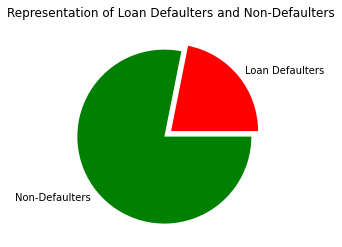

In [23]:
#Number of loan defaulters and non-defaulters
loan_defaulters = data[data.loan_status == 1].loan_status.count()
non_defaulters = data[data.loan_status == 0].loan_status.count()
# pie chart showing loan defaulters vs non-defaulters
values = [loan_defaulters, non_defaulters]
colors = ['r', 'g']
explode = [0, 0.1]
labels = ['Loan Defaulters', 'Non-Defaulters']
plt.pie(values, colors=colors, labels=labels, explode=explode)
plt.title('Representation of Loan Defaulters and Non-Defaulters')
plt.show()

In [88]:
# next, let's see the relationship between loan_status as regards loan_grade and loan_percent_income
fig = px.box(data, x="loan_grade", y="loan_percent_income",
color="loan_status",
color_discrete_sequence=px.colors.qualitative.Dark24,
labels={col:col.replace('_','-') for col in data.columns},
category_orders={'loan_grade':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",
                y=1.02, xanchor="right", x=1))
fig.show()

## Model

### Split data into train set and into test set

In [43]:
# Split the data into training and testing sets
X = data.drop('loan_status', axis=1)
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size=0.2, stratify=data['loan_status'], shuffle=True)

#shuffle: Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
#

In [91]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
data['loan_status'].value_counts(normalize=True)

0    0.781312
1    0.218688
Name: loan_status, dtype: float64

We have 78% of data in loan_status as 1 and 21% as 1

The stratify parameter makes sure the distribution is preserved in both the y_train and the y_test 

In [30]:
y.value_counts(normalize=True)

0    0.781312
1    0.218688
Name: loan_status, dtype: float64

In [31]:
y_test.value_counts(normalize=True)

0    0.781308
1    0.218692
Name: loan_status, dtype: float64

In [44]:
X_train[['person_income','loan_amnt','loan_percent_income']].head()

person_income  loan_amnt  loan_percent_income
20079          38000      15000                 0.39
22038          75000       7000                 0.09
14429         106000      10000                 0.09
4362           21000       4800                 0.23
28058         168000      15500                 0.09

We'll delete loan_percent_income because it is not adding new information, it can be obtained by loan_amnt/person_income

In [45]:
X_train.drop('loan_percent_income',axis=1,inplace=True)
X_test.drop('loan_percent_income',axis='columns',inplace=True)

In [49]:
for col in X_train:
    print(col,'--->', X_train[col].nunique())
    if X_train[col].nunique()<20:
        print(X_train[col].value_counts(normalize=True)*100)
    print()

person_age ---> 58

person_income ---> 3704

person_home_ownership ---> 4
RENT        50.517956
MORTGAGE    41.279159
OWN          7.899785
OTHER        0.303100
Name: person_home_ownership, dtype: float64

person_emp_length ---> 35

loan_intent ---> 6
EDUCATION            19.812769
MEDICAL              18.538981
VENTURE              17.725599
PERSONAL             17.004297
DEBTCONSOLIDATION    16.002916
HOMEIMPROVEMENT      10.915439
Name: loan_intent, dtype: float64

loan_grade ---> 7
A    33.199048
B    31.978975
C    19.774401
D    11.160988
E     2.938920
F     0.751995
G     0.195672
Name: loan_grade, dtype: float64

loan_amnt ---> 721

loan_int_rate ---> 343

cb_person_default_on_file ---> 2
N    82.45089
Y    17.54911
Name: cb_person_default_on_file, dtype: float64

cb_person_cred_hist_length ---> 29



### Identify Numerical columns

In [53]:
numerical_cols = [col for col in X_train if X_train[col].dtypes != 'O']
numerical_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length']

### Histograms

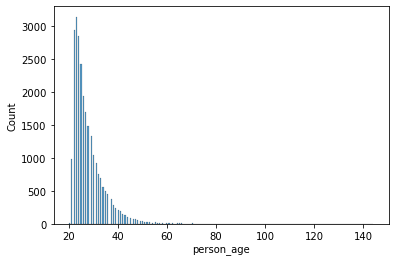

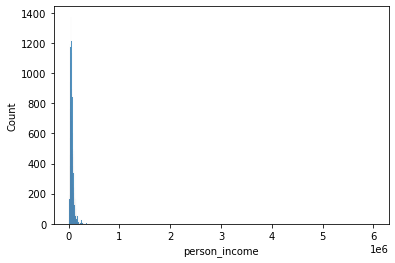

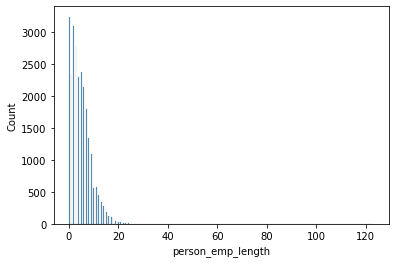

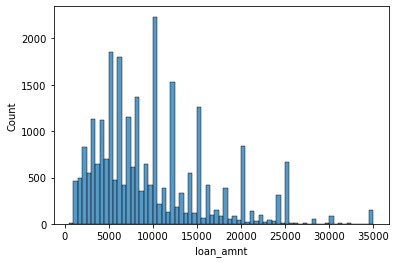

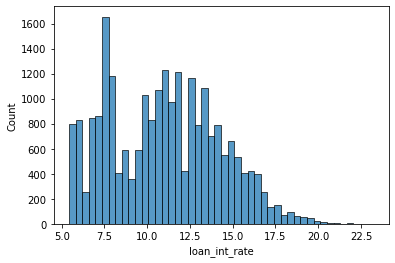

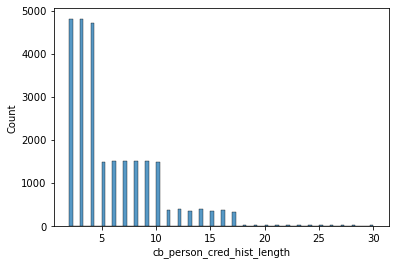

In [57]:
for col in numerical_cols:
    sns.histplot(X_train[col])
    plt.show()

### We'll assume that a person of age 80 or greater will not actually apply for a loan, so we'll get rid of those rows

In [59]:
X_train.loc[X_train['person_age']>=80,:]

person_age  person_income person_home_ownership  person_emp_length  \
32416          94          24000                  RENT                1.0   
183           144         200000              MORTGAGE                4.0   
747           123          78000                  RENT                7.0   
32297         144        6000000              MORTGAGE               12.0   
32422          80          64000                  RENT                7.0   
81            144         250000                  RENT                4.0   
575           123          80004                  RENT                2.0   
32506          84          94800              MORTGAGE                2.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  \
32416     MEDICAL          C       6500            NaN   
183     EDUCATION          B       6000          11.86   
747       VENTURE          B      20000            NaN   
32297    PERSONAL          C       5000          12.73   
32422     MEDICAL          B       6800          11.71   
81        VENTURE          C       4800          13.57   
575     EDUCATION          B      20400          10.25   
32506    PERSONAL          A      10000           7.51   

      cb_person_default_on_file  cb_person_cred_hist_length  
32416                         N                          27  
183                           N                           2  
747                           N                           4  
32297                         N                          25  
32422                         N                          25  
81                            N                           3  
575                           N                           3  
32506                         N                          24

In [60]:
X_train = X_train.loc[X_train['person_age']<80, :]

In [61]:
X_train.shape

(26056, 10)

### 14 years old is the age where a person is legally aloud to work, we'll asume any person working for more than 66 years is automatically not a good candidate for a loan

In [62]:
X_train.loc[X_train['person_emp_length']>=66,:]

person_age  person_income person_home_ownership  person_emp_length  \
210          21         192000              MORTGAGE              123.0   
0            22          59000                  RENT              123.0   

    loan_intent loan_grade  loan_amnt  loan_int_rate  \
210     VENTURE          A      20000           6.54   
0      PERSONAL          D      35000          16.02   

    cb_person_default_on_file  cb_person_cred_hist_length  
210                         N                           4  
0                           Y                           3

In [63]:
#Also we'll assume that person_age <= 14 years + person_employment_length
data.query("person_age<=person_emp_length+14")

person_age  person_income person_home_ownership  person_emp_length  \
0            22          59000                  RENT              123.0   
210          21         192000              MORTGAGE              123.0   

    loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0      PERSONAL          D      35000          16.02            1   
210     VENTURE          A      20000           6.54            0   

     loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                   0.59                         Y                           3  
210                 0.10                         N                           4

#

In [64]:
X_train = X_train.loc[(X_train['person_emp_length']<66 | X_train['person_emp_length'].isna()), :]

In [66]:
# since we've removed some data from X_train, we need to pass on these updates to y_train as well,
# as y_train doesn't know some of its corresponding X_trains's have been deleted.
y_train = y_train[X_train.index]

### Identify categorical columns

In [67]:
categorical_cols = [col for col in X_train if X_train[col].dtypes == 'O']
categorical_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

### Pipeline

In [79]:

num_pipe = Pipeline([
    ('impute', IterativeImputer()), #impute all missing values
    ('scale', StandardScaler()), #scale all numerical columns
])

### Column Transformer

In [81]:
ct = ColumnTransformer([
    ('num_pipe', num_pipe, numerical_cols),
    ('cat_cols', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

#For the numerical columns, We have two columns with missing values: person_emp_length and loan_int_rate. So we need to antem them
#For the categorical columns, since we dont have missing values we simplu just run OneHotEncoder

In [87]:
#this grid is basically a dictionary
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[300,400,500],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
    
    #LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1):
    #{'model__n_estimators':[300,400,500],
     #'model__learning_rate':[0.001,0.01,0.1,1,10],
     #'model__boosting_type': ['gbdt', 'goss', 'dart'],
     #'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                        #KNeighborsRegressor()]},
#}

SyntaxError: unexpected EOF while parsing (2901484064.py, line 13)